Statistiques Descriptives
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000

Matrice de correlation
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


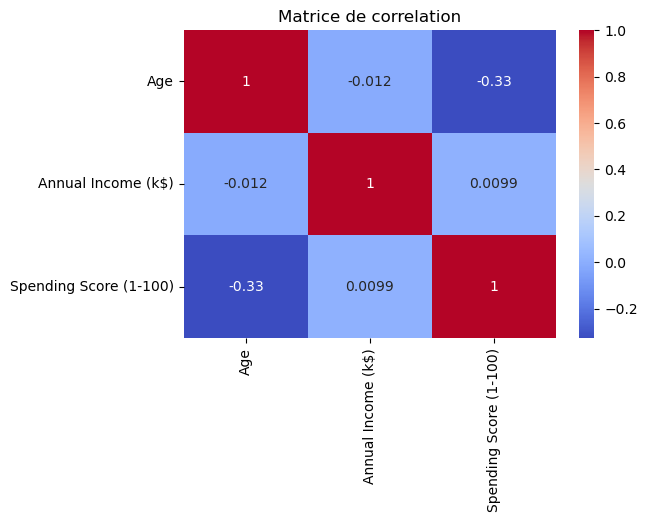

Donnees Normalisees
   CustomerID   Genre       Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male -1.424569           -1.738999               -0.434801
1           2    Male -1.281035           -1.738999                1.195704
2           3  Female -1.352802           -1.700830               -1.715913
3           4  Female -1.137502           -1.700830                1.040418
4           5  Female -0.563369           -1.662660               -0.395980


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

#PARTIE II
#Exploration 

#Statistiques descriptives 
df = pd.read_csv("Mall_Customers.csv")
print("Statistiques Descriptives")
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe())

#matrice de correlattion 
print("\nMatrice de correlation")
mat_corr = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
print(mat_corr)


plt.figure(figsize=(6,4))
sns.heatmap(mat_corr, annot=True, cmap="coolwarm")
plt.title("Matrice de correlation")
plt.show()

#normalisation de donnees 
val = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_normal = df.copy()
df_normal[val] = StandardScaler().fit_transform(df[val])
print("Donnees Normalisees")
print(df_normal.head())


In [2]:
#Partie Matrice de var-covar et ACP 


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

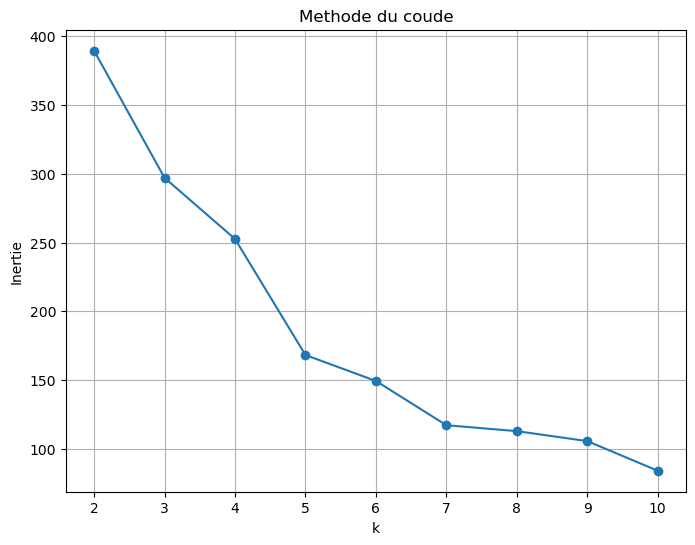

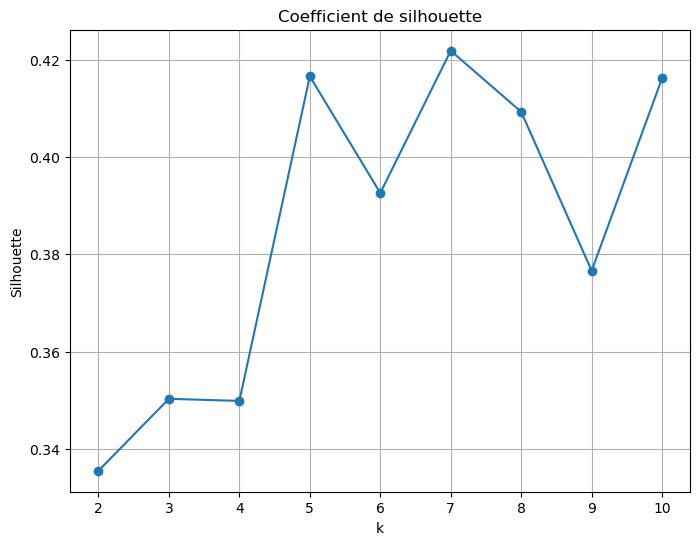

k optimal : 7


In [3]:
#KMeans 

x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
x_scaled = StandardScaler().fit_transform(x)

#Methode du coude + silhouette 
inertias = []
silhouettes = []
rang = range(2,11)

for k in rang:
    kmeans = KMeans(n_clusters = k, random_state = 0, n_init='auto')
    labels = kmeans.fit_predict(x_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(x_scaled, labels))
    
plt.figure(figsize=(8,6))
plt.plot(rang, inertias, marker='o')
plt.title("Methode du coude")
plt.xlabel("k")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()
    
plt.figure(figsize=(8,6))
plt.plot(rang, silhouettes, marker='o')
plt.title("Coefficient de silhouette")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.grid(True)
plt.show()

k_op = rang[np.argmax(silhouettes)]
print("k optimal :",k_op )





In [4]:
kmeans_og = KMeans(n_clusters = k_op, random_state = 0, n_init = 'auto')
df["Cluster_original"] = kmeans_og.fit_predict(x_scaled)
df

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_original
0,1,Male,19,15,39,5
1,2,Male,21,15,81,5
2,3,Female,20,16,6,3
3,4,Female,23,16,77,5
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,6
197,198,Male,32,126,74,2
198,199,Male,32,137,18,6


In [5]:
#PARTIE PCA

x_pca = PCA().fit_transform(x_scaled)

# Nombre de composantes nécessaires pour 90% variance
var = np.cumsum(pca.explained_variance_ratio_)
comp = np.argmax(var >= 0.90) + 1
print("Nombre de composantes PCA retenues :", comp)

x_pca_red = PCA(comp).fit_transform(x_scaled)

kmeans_pca = KMeans(n_clusters=k_op, random_state=0, n_init = 'auto')
df["Cluster_pca"] = kmeans_pca.fit_predict(x_pca_red)
df

NameError: name 'pca' is not defined

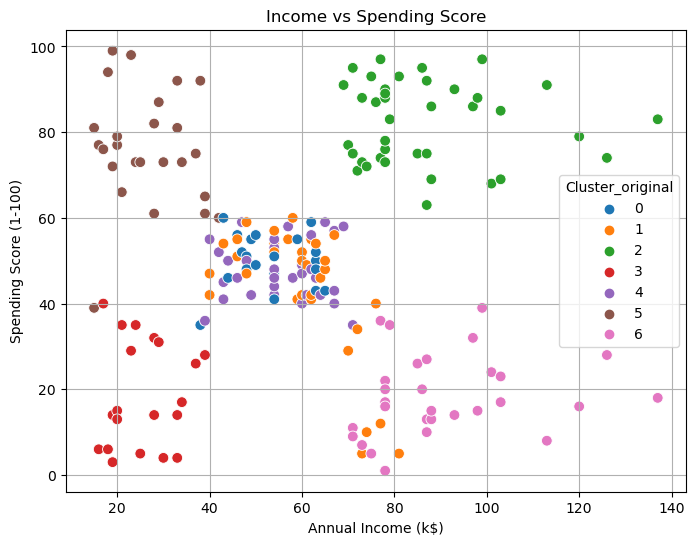

In [6]:
#Scatter plot : Income vs Spending Score 
plt.figure(figsize=(8,6))
sns.scatterplot(
    data = df,
    x = "Annual Income (k$)",
    y = "Spending Score (1-100)",
    hue = "Cluster_original",
    palette = "tab10",
    s = 60
)
plt.title("Income vs Spending Score")
plt.grid(True)
plt.show()


In [7]:
#Caracterisation des clusters 
cluster_summary = df.groupby("Cluster_original")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_summary

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_original,,,
0,64.850000,53.150000,49.850000
1,23.852941,59.088235,43.970588
2,32.692308,86.538462,82.128205
3,45.400000,25.650000,18.550000
4,47.093750,55.562500,47.812500
5,25.560000,26.480000,76.240000
6,44.433333,90.400000,17.933333


In [8]:
df.groupby("Cluster_original")["Genre"].value_counts(normalize = True) * 100
    

Cluster_original  Genre 
0                 Male      60.000000
                  Female    40.000000
1                 Female    58.823529
                  Male      41.176471
2                 Female    53.846154
                  Male      46.153846
3                 Female    65.000000
                  Male      35.000000
4                 Female    65.625000
                  Male      34.375000
5                 Female    56.000000
                  Male      44.000000
6                 Female    50.000000
                  Male      50.000000
Name: proportion, dtype: float64

In [9]:
df["Cluster_original"].value_counts()

Cluster_original
2    39
1    34
4    32
6    30
5    25
3    20
0    20
Name: count, dtype: int64

In [10]:
for c in sorted(df["Cluster_original"].unique()):
    print(cluster_summary.loc[c])

Age                       64.85
Annual Income (k$)        53.15
Spending Score (1-100)    49.85
Name: 0, dtype: float64
Age                       23.852941
Annual Income (k$)        59.088235
Spending Score (1-100)    43.970588
Name: 1, dtype: float64
Age                       32.692308
Annual Income (k$)        86.538462
Spending Score (1-100)    82.128205
Name: 2, dtype: float64
Age                       45.40
Annual Income (k$)        25.65
Spending Score (1-100)    18.55
Name: 3, dtype: float64
Age                       47.09375
Annual Income (k$)        55.56250
Spending Score (1-100)    47.81250
Name: 4, dtype: float64
Age                       25.56
Annual Income (k$)        26.48
Spending Score (1-100)    76.24
Name: 5, dtype: float64
Age                       44.433333
Annual Income (k$)        90.400000
Spending Score (1-100)    17.933333
Name: 6, dtype: float64


In [11]:
#Comparaison 
print(pd.crosstab(df['Cluster_original'], df['Cluster_pca']))

KeyError: 'Cluster_pca'

In [ ]:
silhouette_orig = silhouette_score(x_scaled, df['Cluster_original'])
silhouette_pca = silhouette_score(x_pca_red, df['Cluster_pca'])

print(f"Coeff de silhouette: \n -original : {silhouette_orig:.4f} \n -pca : {silhouette_pca:.4f}")



#Indice de Davies-Bouldin
db_orig = davies_bouldin_score(x_scaled, df['Cluster_original'])
db_pca = davies_bouldin_score(x_pca_red, df['Cluster_pca'])

print("Indice de Davies-Bouldin :")
print(f"Données originales : {db_orig:.4f} et Composantes principales (PCA) : {db_pca:.4f}")

#Meilleur chemin
if silhouette_pca > silhouette_orig and db_pca < db_orig:
    print("K-Means sur PCA produit les meilleurs clusters (meilleure silhouette et DB plus faible).")
elif silhouette_orig > silhouette_pca and db_orig < db_pca:
    print("K-Means sur données originales produit les meilleurs clusters.")
else:
    print("Résultats mitigés")

#ACP
improve_silhouette = silhouette_pca > silhouette_orig
improve_db = db_pca < db_orig

if improve_silhouette and improve_db:
    print("L'utilisation de l'ACP améliore la qualité du clustering.")
else:
    print("L'utilisation de l'ACP n'améliore pas significativement la qualité du clustering.")
